In [2]:
import pandas as pd

dataorg = pd.read_csv('DatabreachesMA2007_2022.csv')
row, col = dataorg.shape

print(f"Number of rows: {row}")
print(f"Number of columns: {col}")

Number of rows: 22994
Number of columns: 13


In [9]:
numerical_columns = dataorg[["MA Residents Affected"]]

# Calculations
minimum = numerical_columns.min()
maximum = numerical_columns.max()
mean = numerical_columns.mean()
median = numerical_columns.median()
std_deviation = numerical_columns.std()


outtable = pd.DataFrame({
    'Statistic': ['Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation'],
    "MA Residents Affected": [minimum["MA Residents Affected"], maximum["MA Residents Affected"], mean["MA Residents Affected"], median["MA Residents Affected"], std_deviation["MA Residents Affected"]]
})

print(outtable)

            Statistic  MA Residents Affected
0             Minimum           0.000000e+00
1             Maximum           2.982421e+06
2                Mean           7.149007e+02
3              Median           3.000000e+00
4  Standard Deviation           2.419799e+04


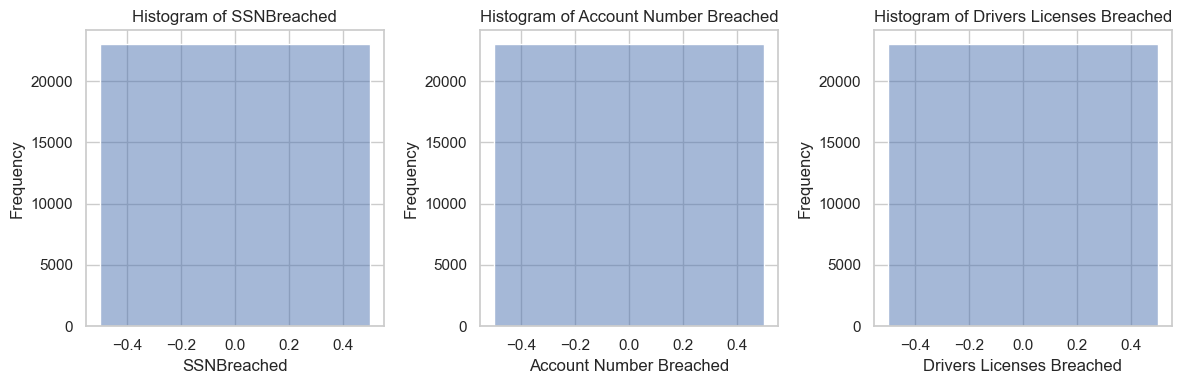

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

###ENCODING###

# Convert the column "SSNBreached" to a boolean column
df["SSNBreached"] = df['SSNBreached'].apply(lambda x: 1 if x == 'Yes' else 0)
df["Account Number Breached"] = df["Account Number Breached"].apply(lambda x: 1 if x == 'Yes' else 0)
df["Drivers Licenses Breached"] = df["Drivers Licenses Breached"].apply(lambda x: 1 if x == 'Yes' else 0)

column1 = "SSNBreached"
column2 = "Account Number Breached"
column3 = "Drivers Licenses Breached"

columns_to_plot = ["SSNBreached", "Account Number Breached", "Drivers Licenses Breached"]

# Create a faceted histogram
sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))

for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [4]:
import seaborn as sns

/Users/yutasugiyama/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


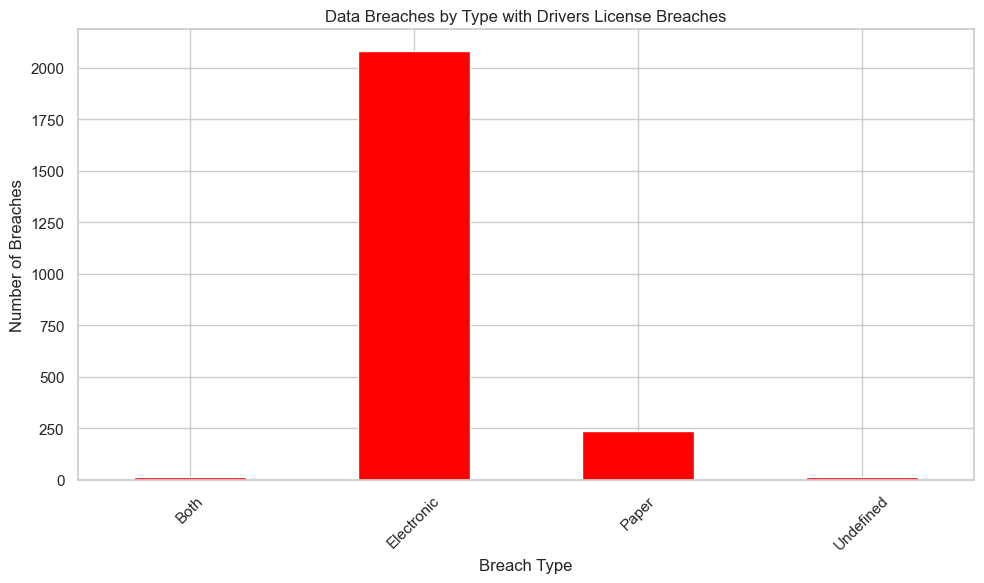

In [11]:

ssn_compromised = dataorg[dataorg['Drivers Licenses Breached'] == 'Yes']

breach_type_counts = ssn_compromised.groupby('Breach Type Description')['Assigned Breach Number'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
breach_type_counts.plot(kind='bar', color = "Red")
plt.title('Data Breaches by Type with Drivers License Breaches')
plt.xlabel('Breach Type')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()